In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as nr

from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble


def dataTransformation(df):
    df['class'] = df['class'].astype("category").cat.codes
    df['stalk-shape'] = df['stalk-shape'].astype("category").cat.codes
    df['stalk-root'] = df['stalk-root'].astype("category").cat.codes
    df['cap-shape'] = df['cap-shape'].astype("category").cat.codes
    df['cap-surface'] = df['cap-surface'].astype("category").cat.codes
    df['odor'] = df['odor'].astype("category").cat.codes
    df['bruises'] = df['bruises'].astype("category").cat.codes
    df['gill-attachment'] = df['gill-attachment'].astype("category").cat.codes
    df['gill-spacing'] = df['gill-spacing'].astype("category").cat.codes
    df['gill-size'] = df['gill-size'].astype("category").cat.codes
    df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].astype("category").cat.codes
    df['stalk-color-above-ring'] = df['stalk-color-above-ring'].astype("category").cat.codes
    df['stalk-color-below-ring'] = df['stalk-color-below-ring'].astype("category").cat.codes
    df['gill-size'] = df['gill-size'].astype("category").cat.codes
    df['ring-number'] = df['ring-number'].astype("category").cat.codes
    df['population'] = df['population'].astype("category").cat.codes
    df['habitat'] = df['habitat'].astype("category").cat.codes
    df['ring-type'] = df['ring-type'].astype("category").cat.codes
    df['spore-print-color'] = df['spore-print-color'].astype("category").cat.codes
    df['veil-type'] = df['veil-type'].astype("category").cat.codes
    df['gill-color'] = df['gill-color'].astype("category").cat.codes
    df['cap-color'] = df['cap-color'].astype("category").cat.codes
    df['veil-color'] = df['veil-color'].astype("category").cat.codes

    return df



def classificationAlgorithm(df, dfTest, features, nFeatures, targetedClass, classifier):
    
    nRows = df.shape[0]
    nRowsTest = dfTest.shape[0]
    
    X = df[features].as_matrix().reshape(nRows, nFeatures)
    XTest = dfTest[features].as_matrix().reshape(nRowsTest, nFeatures)
    
    Y = df[targetedClass].as_matrix().ravel()
    
    trainedClassifier = classifier.fit(X, Y)
    
    dfTest.predicted = trainedClassifier.predict(XTest)
    
    return dfTest


def classificationResults(df, targetedClass, singleFeature):
    
    truePos = df[((df.predicted == 0) & (df[targetedClass] == df.predicted))]
    falsePos = df[((df.predicted == 0) & (df[targetedClass] != df.predicted))]
    trueNeg = df[( (df.predicted != 0) & (df[targetedClass] != 0))]
    falseNeg = df[((df.predicted != 0) & (df[targetedClass] == 0))]

    print('The number of true positives: ', truePos[singleFeature].count())
    print('The number of false positives: ', falsePos[singleFeature].count())
    print('The number of true negatives: ', trueNeg[singleFeature].count())
    print('The number of false negatives: ', falseNeg[singleFeature].count())
    
    
    correctlyClassified = (truePos[singleFeature].count() + trueNeg[singleFeature].count())/df[singleFeature].count() 
    
    print("Correctly Classified: ", correctlyClassified)
    print("Precision: ", truePos[singleFeature].count() / 
                              (truePos[singleFeature].count() + falseNeg[singleFeature].count()))
    
    print("Recall: ", truePos[singleFeature].count()/
                           (truePos[singleFeature].count() + falsePos[singleFeature].count()))

    
def classificationScore(df, targetedClass, singleFeature):
    
    trueNeg = df[( (df.predicted != 0) & (df[targetedClass] != 0))]
    falseNeg = df[((df.predicted != 0) & (df[targetedClass] == 0))]
    truePos = df[((df.predicted == 0) & (df[targetedClass] == df.predicted))]
    falsePos = df[((df.predicted == 0) & (df[targetedClass] != df.predicted))]

    correctlyClassified = ( truePos[singleFeature].count() + trueNeg[singleFeature].count() ) / df[singleFeature].count()     
    
    return correctlyClassified

In [2]:
df = pd.read_csv('C:\\Users\\viktor\\Downloads\\mushroom-classification\\mushrooms.csv')
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p     

In [3]:
df = dataTransformation(df)
print(df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-below-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-color-above-ring stalk-color-below-ring  veil-type  v

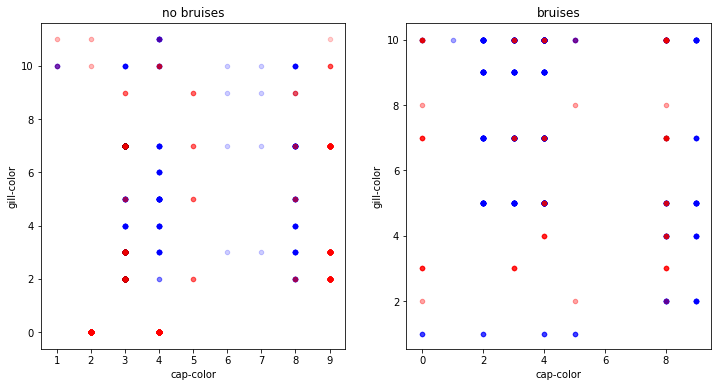

In [4]:
fig = plt.figure(figsize = (12, 6))

ax = fig.add_subplot(121)
ax.set_title("no bruises")
df[(df['class'] == 0) & (df['bruises'] == 0)].plot(kind = 'scatter', x = 'cap-color', y = 'gill-color', ax = ax, color = 'Blue', alpha = 0.05)
df[(df['class'] != 0) & (df['bruises'] == 0)].plot(kind = 'scatter', x = 'cap-color', y = 'gill-color', ax = ax, color = 'Red', alpha = 0.05)

ax = fig.add_subplot(122)
ax.set_title("bruises")
df[(df['class'] == 0)& (df['bruises'] != 0)].plot(kind = 'scatter', x = 'cap-color', y = 'gill-color', ax = ax, color = 'Blue', alpha = 0.05)
df[(df['class'] != 0) & (df['bruises'] != 0)] .plot(kind = 'scatter', x = 'cap-color', y = 'gill-color', ax = ax, color = 'Red', alpha = 0.05)

plt.show()

In [5]:
msk = nr.rand(len(df)) < 0.8
dfTrain = df[msk]
dfTest = df[~msk]


In [6]:
nFeaturesLogR = 16
featuresLogR = ['stalk-shape', 'bruises', 'gill-size' , 'stalk-color-above-ring', 'stalk-root',
                'cap-shape','cap-surface', 'odor', 'gill-color', 'veil-type', 'spore-print-color', 
                'ring-type', 'cap-color', 'veil-color', 'habitat', 'population']

classifier = linear_model.LogisticRegression()
dfTest2 = classificationAlgorithm(dfTrain, dfTest, featuresLogR, nFeaturesLogR, 'class', classifier)

classificationResults(dfTest, 'class', 'odor')

The number of true positives:  792
The number of false positives:  69
The number of true negatives:  673
The number of false negatives:  50
Correctly Classified:  0.924873737374
Precision:  0.940617577197
Recall:  0.919860627178


In [7]:
from sklearn.model_selection import train_test_split

dfTrain2, dfValidation = train_test_split(dfTrain, train_size = 0.25)

bestScore = 0
bestCParam = -1

for i in range(1,100):
        classifier = linear_model.LogisticRegression(C = 0.1*i)
        dfValidation = classificationAlgorithm(dfTrain, dfValidation, featuresLogR, nFeaturesLogR, 'class', classifier)
        score = classificationScore(dfValidation, 'class', 'odor')
        if score > bestScore:
            bestScore = scor 
            bestCParam = 0.1 * i

print(bestScore)
print(bestCParam)

0.925993883792
4.1000000000000005


In [8]:
classifier = linear_model.LogisticRegression(C = bestCParam)
dfTest2 = classificationAlgorithm(dfTrain, dfTest, featuresLogR, nFeaturesLogR, 'class', classifier)

classificationResults(dfTest, 'class', 'odor')

The number of true positives:  792
The number of false positives:  65
The number of true negatives:  677
The number of false negatives:  50
Correctly Classified:  0.927398989899
Precision:  0.940617577197
Recall:  0.924154025671


In [9]:
nFeatures = 11
features = ['stalk-shape', 'stalk-root', 'cap-shape', 'cap-surface', 'odor', 'gill-color', 'veil-type', 'spore-print-color', 'ring-type', 'habitat', 'population']

classifier = svm.SVC()
dfTest2 = classificationAlgorithm(dfTrain, dfTest, features, nFeatures, 'class', classifier)
classificationResults(dfTest, 'class', 'odor')

The number of true positives:  842
The number of false positives:  0
The number of true negatives:  742
The number of false negatives:  0
Correctly Classified:  1.0
Precision:  1.0
Recall:  1.0


In [10]:
classifier = tree.DecisionTreeClassifier()
dfTest2 = classificationAlgorithm(dfTrain, dfTest, features, nFeatures, 'class', classifier)
classificationResults(dfTest, 'class', 'odor')

The number of true positives:  842
The number of false positives:  0
The number of true negatives:  742
The number of false negatives:  0
Correctly Classified:  1.0
Precision:  1.0
Recall:  1.0


In [11]:
classifier = ensemble.RandomForestClassifier()
dfTest2 = classificationAlgorithm(dfTrain, dfTest, features, nFeatures, 'class', classifier)
classificationResults(dfTest, 'class', 'odor')

The number of true positives:  842
The number of false positives:  0
The number of true negatives:  742
The number of false negatives:  0
Correctly Classified:  1.0
Precision:  1.0
Recall:  1.0
